# Model Training

* Importing Libraries

In [1541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,AdaBoostRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso,LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

* Import the CSV Data as Pandas DataFrame

In [1542]:
df = pd.read_csv('DATA/processed_data.csv')

* Show Top 5 Records

In [1543]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High_BP,Low_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


## 1. X (Independent) and y (Dependent) variables

In [1544]:
# Identify features and target
X = df.drop(columns=['Person ID', 'Sleep Disorder'])
y = df['Sleep Disorder']

## 2. Standardizing Independent Variables

### 2.1 Splitting Categorical and Numerical Columns

In [1545]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols,numerical_cols

(Index(['Gender', 'Occupation', 'BMI Category'], dtype='object'),
 Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'Heart Rate', 'Daily Steps', 'High_BP', 'Low_BP'],
       dtype='object'))

### 2.1.1 Encoding Categorical Variables

#### 2.1.1.1 Encoding Gender & Occupation (LabelEncoder)

In [1546]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    if col != 'BMI Category':  
        X[col] = label_encoder.fit_transform(X[col])


* Reason: With only two categories, Label Encoding is simple and effective, converting 'Male' and 'Female' into binary values (e.g., 0 and 1). This works well, especially if there’s no need to treat these as nominal features in a model like linear regression.

* Reason: Occupations are nominal categories with no inherent order. Since the number of unique occupations is moderate, Label Encoding will effectively capture the categorical information without imposing any ordinal relationship.

* Reason: Sleep Disorders are nominal categories with no inherent order. Label Encoding ensures that no artificial ordinal relationship is imposed, which is important for maintaining the integrity of the data in models that don’t assume order.

#### 2.1.1.2 Encoding BMI Category (Ordinal Mapping)

In [1547]:
ordinal_mapping = {
    'Normal Weight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}
X['BMI Category'] = X['BMI Category'].map(ordinal_mapping)

* Reason: BMI categories have a clear ordinal relationship (Normal < Overweight < Obese). Ordinal Encoding preserves this order, which can be beneficial for models that can leverage the ordinal nature of the data.

In [1548]:
print(X.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             2          75   
2                       60             8             2          75   
3                       30             8             4          85   
4                       30             8             4          85   

   Daily Steps  High_BP  Low_BP  
0         4200    126.0    83.0  
1        10000    125.0    80.0  
2        10000    125.0    80.0  
3         3000    140.0    90.0  
4         3000    140.0 

### 2.2 Encoding Numerical Variables

In [1549]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify the changes
print(X.head())

   Gender       Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1 -1.753096           9       -1.298887         -1.098280   
1       1 -1.637643           1       -1.173036         -1.098280   
2       1 -1.637643           1       -1.173036         -1.098280   
3       1 -1.637643           6       -1.550588         -2.771424   
4       1 -1.637643           6       -1.550588         -2.771424   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                -0.825418      0.347021             3    1.654719   
1                 0.039844      1.475592             2    1.170474   
2                 0.039844      1.475592             2    1.170474   
3                -1.402260      1.475592             4    3.591698   
4                -1.402260      1.475592             4    3.591698   

   Daily Steps   High_BP    Low_BP  
0    -1.619584 -0.330002 -0.268102  
1     1.970077 -0.459239 -0.755640  
2     1.970077 -0.459239 -0.755640  
3    -2.362273  

## 3. Standardizing Dependent Variable 

In [1550]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(y)

[1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 2 2 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


## 4. Checking for outliers after performing Encoding techniques.

**Outlier Detection Strategy**
* Some columns, like Heart Rate, Daily Steps, and Sleep Duration, might have outliers that could impact model performance.
* We can identify outliers using methods like the Interquartile Range (IQR) and then decide whether to remove or transform these values.

In [1551]:
def detect_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        num_outliers = np.sum(is_outlier)
        print(f"{col}:{num_outliers}")
    
    return detect_outliers_iqr

outliers_iqr_summary = detect_outliers_iqr(X[numerical_cols])

Age:0
Sleep Duration:0
Quality of Sleep:0
Physical Activity Level:0
Stress Level:0
Heart Rate:15
Daily Steps:0
High_BP:0
Low_BP:0


* As we can see outliers in the column 'Heart Rate'. For more clarity lets visualize it

### 4.1 Visualizing Outliers

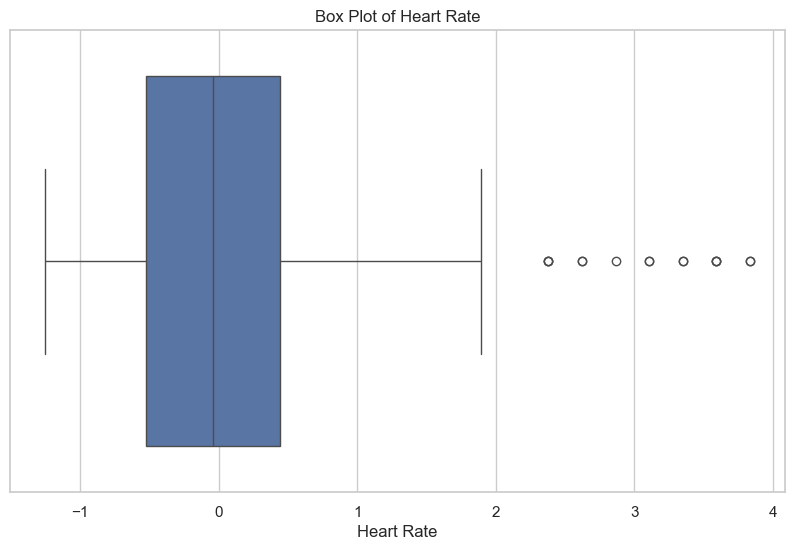

In [1552]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['Heart Rate'])
plt.title('Box Plot of Heart Rate')
plt.xlabel('Heart Rate')
plt.show()


* Lets cap the outliers in the dataset manually using **IQR method**.

### 4.2 Capping Outliers using IQR Method

In [1553]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

def detect_remaining_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
    return df[is_outlier]


X = cap_outliers(X, 'Heart Rate')
remaining_outliers = detect_remaining_outliers(X, 'Heart Rate')
print(f"The number of outliers remaining are: {len(remaining_outliers)}")


The number of outliers remaining are: 0


In [1554]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,High_BP,Low_BP
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,-0.330002,-0.268102
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,2,1.170474,1.970077,-0.459239,-0.755640
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,2,1.170474,1.970077,-0.459239,-0.755640
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,4,1.896841,-2.362273,1.479309,0.869486
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,4,1.896841,-2.362273,1.479309,0.869486


## 5. Split the data into train and test sets

In [1555]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [1556]:
# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape), label_encoder.classes_

(((299, 12), (75, 12), (299,), (75,)),
 array(['Insomnia', 'No Sleep Disorder', 'Sleep Apnea'], dtype=object))

### 5.1) Create an Evaluate Function to give all metrics after model Training

In [1557]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

# Classification models
classification_models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = evaluate_classification_model(y_train, y_train_pred)
    test_metrics = evaluate_classification_model(y_test, y_test_pred)
    
    print(f"{name} - Classification")
    print('Training set performance:')
    print(f"- Accuracy: {train_metrics[0]:.4f}")
    print(f"- Precision: {train_metrics[1]:.4f}")
    print(f"- Recall: {train_metrics[2]:.4f}")
    print(f"- F1 Score: {train_metrics[3]:.4f}")
    print('Test set performance:')
    print(f"- Accuracy: {test_metrics[0]:.4f}")
    print(f"- Precision: {test_metrics[1]:.4f}")
    print(f"- Recall: {test_metrics[2]:.4f}")
    print(f"- F1 Score: {test_metrics[3]:.4f}")
    print('='*35)
    print('\n')



Decision Tree Classifier - Classification
Training set performance:
- Accuracy: 0.9298
- Precision: 0.9306
- Recall: 0.9298
- F1 Score: 0.9300
Test set performance:
- Accuracy: 0.9067
- Precision: 0.9084
- Recall: 0.9067
- F1 Score: 0.9072


Random Forest Classifier - Classification
Training set performance:
- Accuracy: 0.9298
- Precision: 0.9298
- Recall: 0.9298
- F1 Score: 0.9297
Test set performance:
- Accuracy: 0.9467
- Precision: 0.9484
- Recall: 0.9467
- F1 Score: 0.9459


Gradient Boosting Classifier - Classification
Training set performance:
- Accuracy: 0.9264
- Precision: 0.9265
- Recall: 0.9264
- F1 Score: 0.9264
Test set performance:
- Accuracy: 0.9467
- Precision: 0.9484
- Recall: 0.9467
- F1 Score: 0.9459


K-Neighbors Classifier - Classification
Training set performance:
- Accuracy: 0.8930
- Precision: 0.8942
- Recall: 0.8930
- F1 Score: 0.8934
Test set performance:
- Accuracy: 0.9200
- Precision: 0.9234
- Recall: 0.9200
- F1 Score: 0.9207


SVC - Classification
Training 